<a href="https://colab.research.google.com/github/EduardoMoraesRitter/deep-learning-tensorflow-python/blob/main/1%20-%20primeiro_perceptron_Fahrenheit_DL_TensorFlow_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Construa perceptrons simples para converter temperaturas de Celsius para Fahrenheit

Rede Neural que encontra sozinha o valor Y dado o valor X, Equação conversão: **T(F°) = T(C°) x 9/5 + 35**

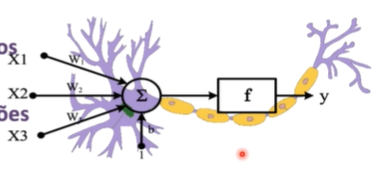

X1,X2,X3 - dados de entrada os valores

W1,W2,W3 - pesos, oq é aprendido pela rede(descoberto)

SOMA (E) - funcao de soma

Bias (b) - vies adcionado automaticamente para operacao de soma(descoberto)

funcao f - funcao de ativacao

saida Y  - o resultado ou a saida

Error - feadback e update a rede aprende com erros

FORMULA:
Output = Input * W1 + Bias

#BIBLIOTECAS

In [ ]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [1]:
#importar o tensoflow e escolhar a versao 2.0
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.4.1'

In [2]:
#carragar os dados
import pandas as pd

#trabalhar com dados cientificos,  matrix e vetor
import numpy as np

#visualizacao grafica
import seaborn as sns

#recursos de plotagem
import matplotlib.pyplot as plt

#IMPOTAR DADOS

In [3]:
temperatura_df = pd.read_csv('https://raw.githubusercontent.com/EduardoMoraesRitter/deep-learning-tensorflow-python/main/data/Celsius-to-Fahrenheit.csv')
#remover o indece
temperatura_df.reset_index(drop=True, inplace=True)
temperatura_df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [ ]:
#tipo de dado e valor faltante
temperatura_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [ ]:
#descricao dos dados, desvio padrao, quarts
temperatura_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


#VISUALIZAR

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


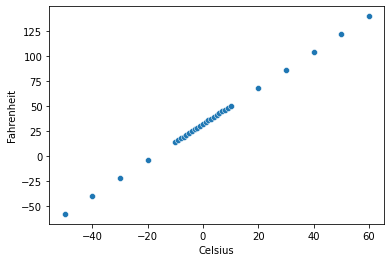

In [ ]:
#grafico de disperção, o ; remove descricao 
sns.scatterplot(temperatura_df['Celsius'], temperatura_df['Fahrenheit']);

#BASE DE TREINAMENTO E TESTE

In [ ]:
X_train = temperatura_df['Celsius']
Y_train = temperatura_df['Fahrenheit']

#tamanho da dados
X_train.shape

(30,)

#MODELO

In [ ]:
#sequencia de camadas
model = tf.keras.Sequential()
#Dense é todos os neuronios ligados a proxima camada
#units a saida
#input_shape entrada
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

#resumo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compilar o modelo
#optimizer é o algotimo da funcao
#decisa do gradiente Adam, taxa de aprendizagem, quan rapido ele aprende
#loss funcao de erro quadrado = mean_squared_error 
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

In [ ]:
#loop de 100 epocas
epochs_hist = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 256ms/step - loss: 6.3665e-13
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 1.4891
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2165
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 1.3570
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5171
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0106
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.5502
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.7160
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2508
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2586
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4539
Epoch 13/100
1/1 [==============================] - 0s 

#AVALIAR

In [ ]:
#o historico do lost
epochs_hist.history.keys()

dict_keys(['loss'])

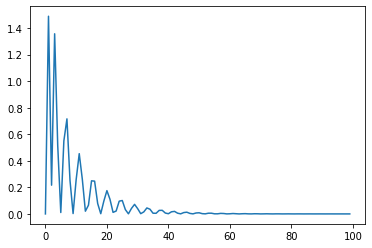

In [ ]:
#grafico de erro
plt.plot(epochs_hist.history['loss'])

In [ ]:
#analizar os pesos o W = 1.8 e bias = 31
model.get_weights()

[array([[1.8002218]], dtype=float32), array([31.999813], dtype=float32)]

In [ ]:
#testar o modelo
grau_celsos = 0
model.predict([grau_celsos])

array([[31.999813]], dtype=float32)